In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


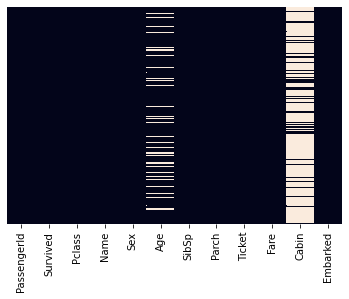

In [3]:
###################################################EDA###############################################


####checking Null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

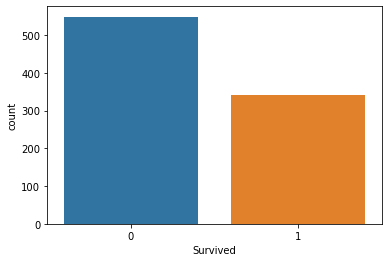

In [4]:
##########Checking Target Variable
sns.countplot(x='Survived', data= df)

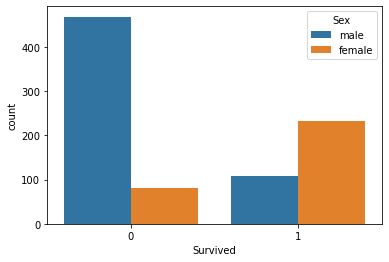

In [5]:
sns.countplot(x='Survived', hue='Sex', data= df)

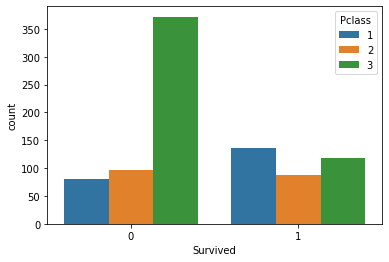

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=df)

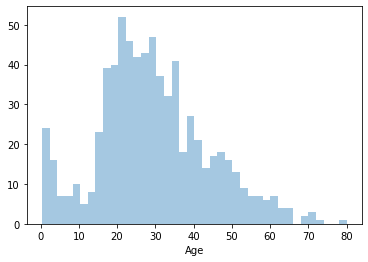

In [7]:
sns.distplot(df['Age'].dropna(),kde=False,bins=40)

##if we don't give KDE as false it shows in probability values

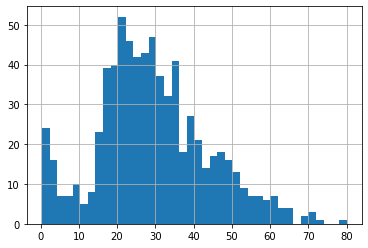

In [8]:
df['Age'].hist(bins=40)

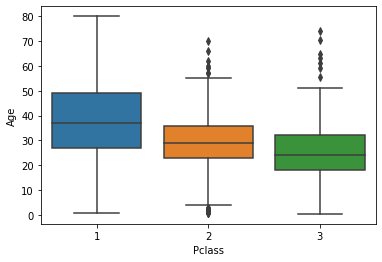

In [9]:
sns.boxplot(x='Pclass', y='Age', data = df)

In [22]:
#print(df.loc[df['Age'].isnull(), 'Age'].head())
#df.loc[df['Age'].isnull(),  'Age'] = 

#if(!df['Age'].isnull()):
#    df[['Pclass', 'Age']] = 
#df[['Pclass', 'Age']]
print(df.groupby(['Pclass'])['Age'].mean())
#test = df['Age'].groupby(df['Pclass']).mean()
#print(test)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [42]:
###Imputing age using mean of age based on Pclass

mean_ages = df.groupby(['Pclass'])['Age'].mean()
def remove_na_ages(row):
    if (pd.isnull(row['Age'])):
        #print(row['Age'],row['Pclass'],mean_ages[row['Pclass']])
        return(mean_ages[row['Pclass']])
    else:
               return(row['Age'])
       
#print(mean_ages)
df['Age'] = df.apply(remove_na_ages, axis = 1)
print(df['Age'].isnull().sum())
#df.apply(remove_na_ages, axis = 1)

0


0


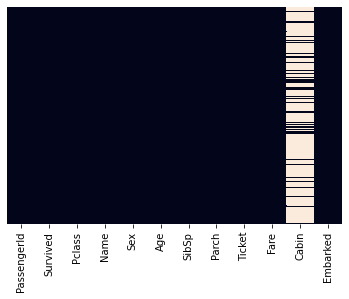

In [43]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [44]:
# Feature selection
#df.isnull().sum()

# Drop irrelevant features
df.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis='columns', inplace = True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [46]:
####Converting Categorical features
pd.get_dummies(df['Embarked'], drop_first = True).head()

sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)


In [47]:
#####dropping features that are not required and the categorical features that are converted
df.drop(['Sex', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [48]:
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [50]:
df = pd.concat([df, sex, embark], axis = 1)

In [51]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


# Data Cleaning is done using EDA

In [52]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train,  y_test = train_test_split(df.drop(['Survived'], axis = 1), df['Survived'], test_size = 0.3, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel  = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [58]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
accuracy = confusion_matrix(y_test, predictions)

In [61]:
accuracy

array([[136,  21],
       [ 29,  82]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8134328358208955